## Overview of Models
1. Linear Regression
2. Random Forest Regression Model
3. GradientBoosting Regression
3. ARIMA Time Series Model

## Steps
1. import SQL data to Pandas DataFrames
2. split model into training and testing data
3. import relevant models
4. train

In [14]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
import numpy as np

### Preprocessing for Governance Model

In [6]:
governance_path = "C:\\Users\\Harb\\OneDrive\\Documents\\foreign-direct-investment-analysis\\data\\processed\\political_factors\\governance_indicators.csv"
fdi_path = "C:\\Users\\Harb\\OneDrive\\Documents\\foreign-direct-investment-analysis\\data\\processed\\fdi_data\\fdi_data.csv" 

governance_df = pd.read_csv(governance_path)
fdi_df = pd.read_csv(fdi_path)

governance_df.columns

Index(['Year', 'Series Name', 'Country Name', 'Value'], dtype='object')

In [ ]:
country_name_values = governance_df['Country Name'].unique()
country_code_values = fdi_df['Country Code'].unique()

governance_year_range = governance_df['Year'].unique()
fdi_year_range = fdi_df['Year'].unique()

country_name_values, country_code_values, governance_year_range, fdi_year_range


(array(['China', 'India'], dtype=object),
 array(['CHN', 'IND'], dtype=object),
 array([1996, 1998, 2000, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
        2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
        2021, 2022, 2023], dtype=int64),
 array([1985., 1986., 1987., 1988., 1989., 1990., 1991., 1992., 1993.,
        1994., 1995., 1996., 1997., 1998., 1999., 2000., 2001., 2002.,
        2003., 2004., 2005., 2006., 2007., 2008., 2009., 2010., 2011.,
        2012., 2013., 2014., 2015., 2016., 2017., 2018., 2019., 2020.,
        2021., 2022., 2023.]))

In [ ]:
governance_data_wide = governance_df.pivot_table(
    index=["Year", "Country Name"], 
    columns="Series Name", 
    values="Value"
).reset_index()


country_mapping = {'China': 'CHN', 'India': 'IND'}
governance_data_wide['Country Name'] = governance_data_wide['Country Name'].map(country_mapping)

merged_data = pd.merge(
    fdi_df, 
    governance_data_wide, 
    how="inner", 
    left_on=["Year", "Country Code"], 
    right_on=["Year", "Country Name"]
)

merged_data.drop(['Country Code', 'Country Name'], axis=1, inplace=True)

merged_data = merged_data.dropna()
merged_data.head(10)

,Year,GDP (Billion USD),FDI Percentage,Absolute FDI (Billion USD),Control of Corruption: Estimate,Control of Corruption: Number of Sources,Control of Corruption: Percentile Rank,"Control of Corruption: Percentile Rank, Lower Bound of 90% Confidence Interval","Control of Corruption: Percentile Rank, Upper Bound of 90% Confidence Interval",Control of Corruption: Standard Error,...,Rule of Law: Percentile Rank,"Rule of Law: Percentile Rank, Lower Bound of 90% Confidence Interval","Rule of Law: Percentile Rank, Upper Bound of 90% Confidence Interval",Rule of Law: Standard Error,Voice and Accountability: Estimate,Voice and Accountability: Number of Sources,Voice and Accountability: Percentile Rank,"Voice and Accountability: Percentile Rank, Lower Bound of 90% Confidence Interval","Voice and Accountability: Percentile Rank, Upper Bound of 90% Confidence Interval",Voice and Accountability: Standard Error
0,1996.0,860.47,4.651813,40.027452,-0.271190,7.0,48.387096,32.258064,58.602150,0.188622,...,33.668343,22.110552,43.718594,0.194236,-1.361545,7.0,12.000000,3.000000,16.500000,0.208056
1,1998.0,1024.17,4.435501,45.427071,-0.353955,7.0,45.989304,33.689838,53.475937,0.172851,...,36.000000,24.500000,46.500000,0.197575,-1.437438,7.0,8.955224,2.487562,15.422886,0.213555
2,2000.0,1205.53,3.475126,41.893685,-0.208549,7.0,49.468086,40.425533,58.510639,0.166503,...,35.323383,27.860697,41.791046,0.162371,-1.384081,8.0,9.950249,2.985075,17.412935,0.202216
3,2002.0,1465.83,3.609081,52.902994,-0.557898,7.0,35.978836,25.396826,46.031746,0.158719,...,37.810944,25.373135,45.771145,0.175007,-1.594193,10.0,6.467662,1.492537,10.945273,0.163098
4,2003.0,1656.96,3.487419,57.785136,-0.395265,8.0,43.915344,32.275131,53.439152,0.154182,...,35.323383,23.383085,44.278606,0.175550,-1.512429,10.0,7.462687,1.990050,11.940298,0.166094
5,2004.0,1949.45,3.483642,67.911850,-0.565062,10.0,33.497536,24.630543,43.842365,0.147011,...,35.576923,20.673077,42.788460,0.166274,-1.462464,12.0,8.173077,3.365385,14.903846,0.150062
6,2005.0,2290.02,4.554263,104.293545,-0.617888,10.0,32.195122,20.975609,42.926830,0.142574,...,32.057415,21.052631,40.669857,0.161807,-1.500785,12.0,7.692307,3.846154,11.057693,0.153107
7,2006.0,2754.15,4.508601,124.173621,-0.518888,11.0,37.073170,25.365854,46.341465,0.139042,...,28.708134,19.138756,41.148327,0.154278,-1.748970,13.0,5.769231,2.403846,6.730769,0.121711
8,2007.0,3555.66,4.400983,156.484004,-0.599235,12.0,32.524273,19.902912,44.174759,0.147818,...,34.449760,22.009569,44.497608,0.153129,-1.721250,15.0,4.807693,2.403846,7.692307,0.116539
9,2008.0,4577.28,3.733611,170.897816,-0.526308,12.0,36.407768,25.728155,47.572815,0.140959,...,37.980770,25.961538,48.557693,0.149962,-1.699497,15.0,5.769231,3.365385,7.692307,0.113357


### Training and Testing the Models

In [ ]:
X = merged_data.drop(['Absolute FDI (Billion USD)', 'FDI Percentage'], axis=1)
y = merged_data['Absolute FDI (Billion USD)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

linear_mse = mean_squared_error(y_test, y_pred_linear)
linear_r2 = r2_score(y_test, y_pred_linear)

rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

print("Linear Regression:")
print(f"MSE: {linear_mse}, R2: {linear_r2}")

print("\nRandom Forest Regression:")
print(f"MSE: {rf_mse}, R2: {rf_r2}")


Linear Regression:
MSE: 30646.463505347598, R2: -2.754513396672807

Random Forest Regression:
MSE: 1083.635552418587, R2: 0.867243272687676


- Linear regression performed poorly - performing worse than a constant function that predicts the mean
    - this is confirmed by the residuals plot
    - this also confirms that the relationship between the variables is not linear
- Random forest model performed well - highlighting the impact of political stability on inflows of FDI

## Visualization

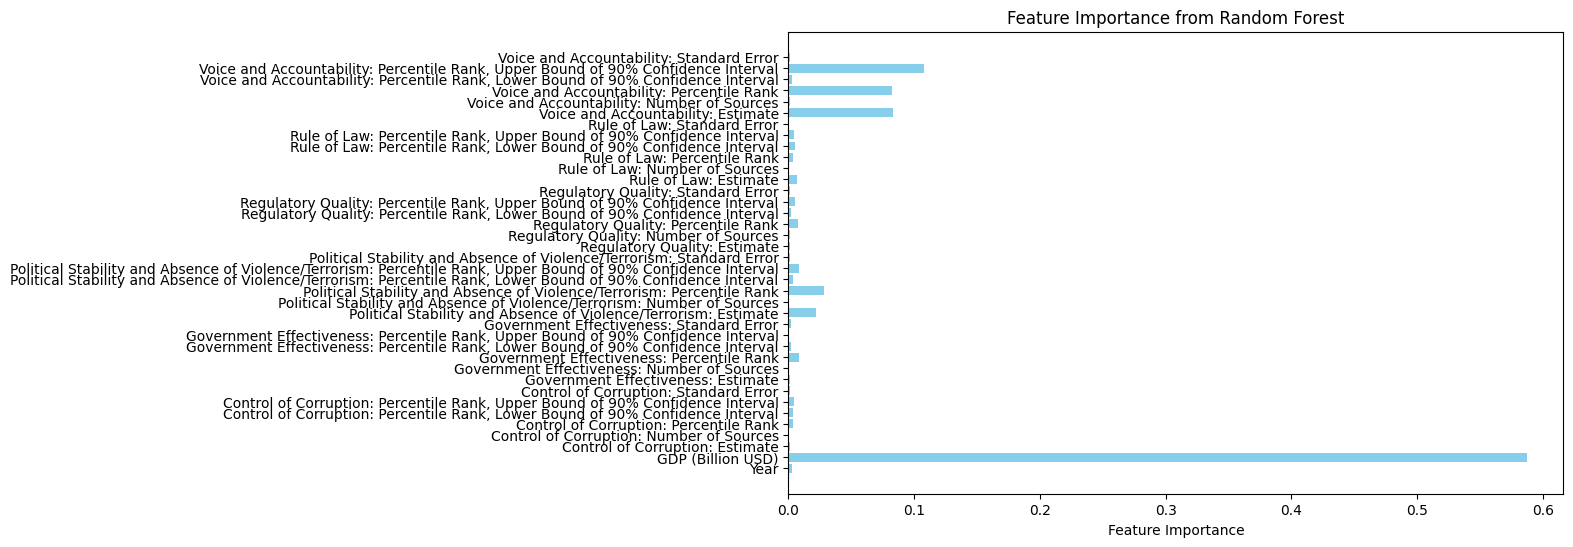

In [ ]:
feature_importances = rf_model.feature_importances_
features = X.columns
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Random Forest')
plt.show()

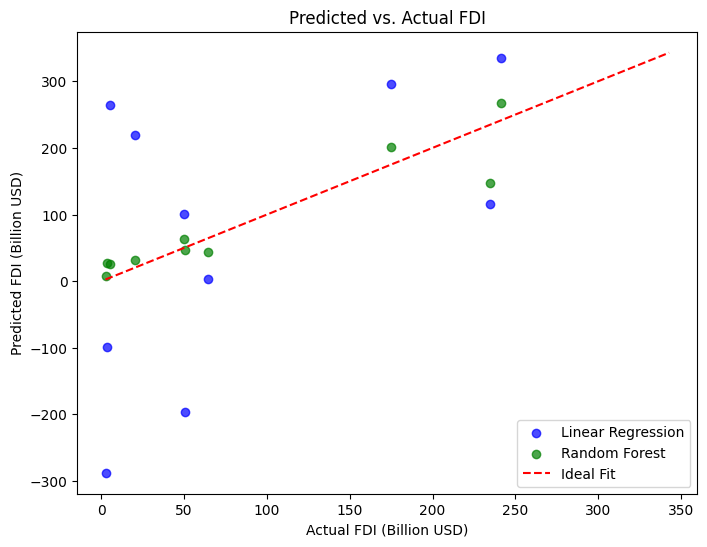

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_linear, alpha=0.7, color='blue', label='Linear Regression')
plt.scatter(y_test, y_pred_rf, alpha=0.7, color='green', label='Random Forest')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual FDI (Billion USD)')
plt.ylabel('Predicted FDI (Billion USD)')
plt.title('Predicted vs. Actual FDI')
plt.legend()
plt.show()

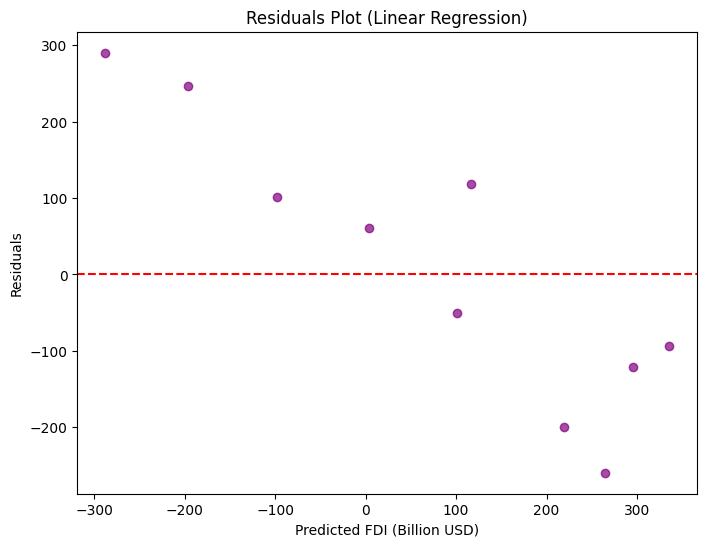

In [ ]:
residuals = y_test - y_pred_linear
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_linear, residuals, alpha=0.7, color='purple')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted FDI (Billion USD)')
plt.ylabel('Residuals')
plt.title('Residuals Plot (Linear Regression)')
plt.show()


## Gradient Boosting
- since the linear regression performed poorly, I will try a model that is more effective at predicting non-linear data with mixed relationships - gradient boosting regression.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

gb_mse = mean_squared_error(y_test, y_pred_gb)
gb_r2 = r2_score(y_test, y_pred_gb)

print("Gradient Boosting Regression:")
print(f"MSE: {gb_mse}, R2: {gb_r2}")

Gradient Boosting Regression:
MSE: 1344.40829427942, R2: 0.835295875147573


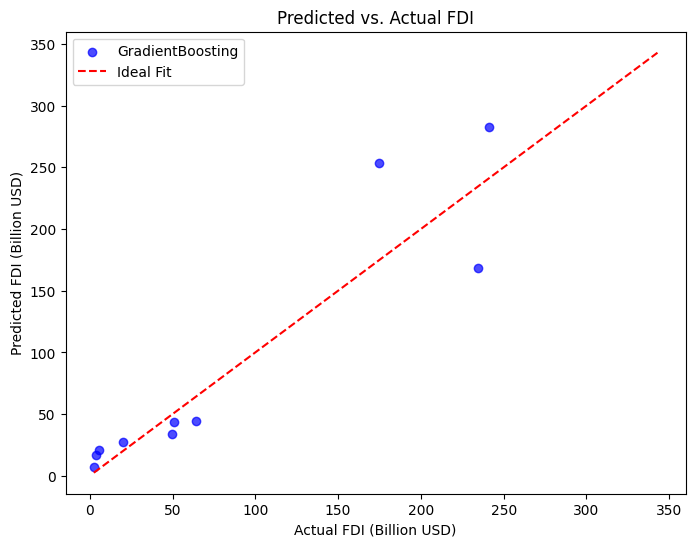

In [20]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_gb, alpha=0.7, color='blue', label='GradientBoosting')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual FDI (Billion USD)')
plt.ylabel('Predicted FDI (Billion USD)')
plt.title('Predicted vs. Actual FDI')
plt.legend()
plt.show()

- The gradient boosting regression model performs much better in predicting FDI based on the provided governance indicators. 